## Exploratory Data Analysis

In [704]:
# Import all basic library needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

#### Definitions:

1. track_name: Name of the song
2. artist(s)_name: Name of the artist(s) of the song.
3. artist_count: Number of artists contributing to the song.
4. released_year: Year when the song was released.
5. released_month: Month when the song was released.
6. released_day: Specific day of the month when the song was released.
7. in_spotify_playlists: Number of Spotify playlists the song is included in.
8. in_spotify_charts: Presence and rank of the song on Spotify charts.
9. streams: Total number of streams on Spotify
10. in_apple_playlists: Number of Apple Music playlists the song is included in
11. in_apple_charts: Presence and rank of the song on Apple Music charts
12. in_deezer_playlists: Number of Deezer playlists the song is included in
13. in_deezer_charts: Presence and rank of the song on Deezer charts
14. in_shazam_charts: Presence and rank of the song on Shazam charts
15. bpm: Beats per minute, a measure of song tempo
16. key: Key of the song
17. mode: Mode of the song (major or minor)
18. danceability_%: Percentage indicating how suitable the song is for dancing
19. valence_%: Positivity of the song's musical content
20. energy_%: Perceived energy level of the song
21. acousticness_%: Amount of acoustic sound in the song
22. instrumentalness_%: Amount of instrumental content in the song
23. liveness_%: Presence of live performance elements
24. speechiness_%: Amount of spoken words in the song

### Initial Exploration:
* Load the data and take time to understand the data
* Check for missing values, and handle it to make the data clean and understandable

In [705]:
# Load the dataset
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Dataset Overview:
* Check for data types, and data size (columns and rows)

In [706]:
# Provides a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

#### The dataset contains data types such as int64 (17), and object (7).

In [707]:
# Gives the size of the dataframe in terms of rows and columns
df.shape

(953, 24)

#### As we can see, the dataset contains a total number of 953 rows, and a total number of 24 columns.

#### Data Preview:
* Display the first 10 rows and random sample of the dataset to see how the data looks like

In [708]:
# Displays the first 10 rows (including 0) of  the dataframe
df.head(11)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [709]:
# Randomly selects and returns 5 rows from the dataframe
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
633,Streets,Doja Cat,1,2019,11,7,5728,0,865640097,85,...,90,B,Major,75,19,46,21,4,34,8
221,CHORRITO PA LAS ANIMAS,Feid,1,2022,12,2,2321,36,345031710,29,...,96,G#,Minor,74,61,83,11,0,35,6
599,positions,Ariana Grande,1,2020,10,23,8207,0,1252563873,175,...,144,NaN,Major,73,66,80,44,0,9,12
587,Miserable Man,David Kushner,1,2022,1,7,788,0,124407432,13,...,110,A#,Major,63,31,35,93,0,29,3
548,Todo De Ti,Rauw Alejandro,1,2020,11,2,11975,8,1168642797,188,...,128,D#,Minor,81,57,63,40,1,10,4


#### Dropping columns:
* In the dataset, we are going to encounter null values in 'in_shazam_charts' and 'key'
* Remove the released_day columns, since the released_year and released_month column already holds the necessary release information for the song.
* To handle the data better and to make the representation clear and concise, the object data type should be converted to category.
* We then apply label encoding to these categorical data.

In [710]:
# Deletes the columns 'released_month' and 'released_day' from the dataset
cols_to_drop = ['released_day']
df.drop(columns=cols_to_drop,axis=1,inplace=True)

#### Changing incorrect data types:

In [711]:
# Convert the specified columns in the dataframe to the category data type
# Display the data types of all the columns in the dataframe in a transposed format 
cols = ["track_name", "artist(s)_name", "streams",'in_deezer_playlists','in_shazam_charts', 'key','mode']
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,category,category,int64,int64,int64,int64,int64,category,int64,int64,...,int64,category,category,int64,int64,int64,int64,int64,int64,int64


#### Check for missing values:
* The dataset contains missing values from specific columns
* To identify, we use isnull().sum() to get the total number of missing values per column

In [712]:
# Gets the total number of missing values per column
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

#### Based on the data above, we can see that there are 50 missing values in the column 'in_shazam_charts' and 95 missing values in the column 'key'. Later on, we will be dealing with those missing values

In [713]:
# Gets the ratio of nulls to the original data
df.isnull().sum() / len(df) * 100

track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

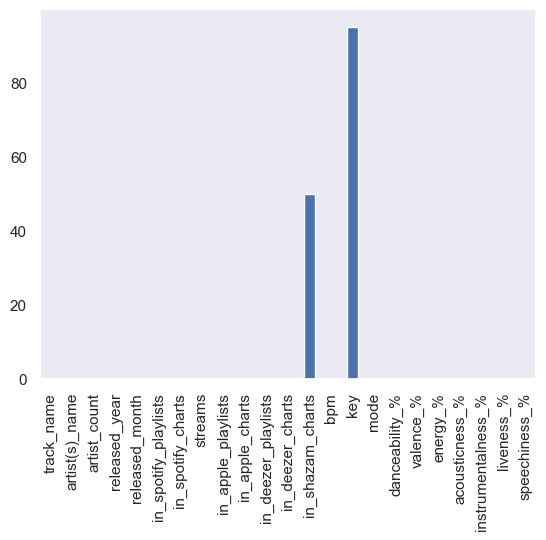

In [714]:
# Displays a bar plot of the number of missing values for each column
df.isnull().sum().plot(kind='bar');

#### Handling missing values:
* Fill the missing values with the mode values, as the data is categorical
* To handle the missing values, we remove those, and ensure that the missing values are removed successfully

In [715]:
# Set a label for columns with missing values
columns_with_missing_values = ['key', 'in_shazam_charts'] 

# Get the mode for each column, and fill missing values with the mode
for column in columns_with_missing_values:
    mode_value = df[column].mode()[0] 
    df[column].fillna(mode_value, inplace=True) 

In [716]:
# Ensure that the null values are removed
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [717]:
# Checks if there is/are duplicated rows in the dataframe
df.duplicated().sum()

0

In [718]:
# Checks for duplicate values in the "track_name" column in the dataframe
df["track_name"].duplicated().sum()

10

#### Statistical overview:
* In this section, we are going to get the statistical measures of the data
* First, we convert text to numbers for better analysis
* Let us first generate new columns for label encoding to preserve the original text for visualization

In [719]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical columns ('track_name', 'artist(s)_name', 'key', and 'mode')
# Add the encoded values as new columns, 'track_name_encoded', to the dataframe
label = LabelEncoder()

for col in ['track_name', 'artist(s)_name','key', 'mode']:
  df[col + '_encoded'] = label.fit_transform(df[col])

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist(s)_name_encoded,key_encoded,mode_encoded
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,141381703,43,263,...,89,83,31,0,8,4,687,326,2,0
1,LALA,Myke Towers,1,2023,3,1474,48,133716286,48,126,...,61,74,7,0,10,4,397,401,3,0
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,140003974,94,207,...,32,53,17,0,31,6,936,431,7,0
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,800840817,116,207,...,58,72,11,0,11,15,170,558,0,0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,303236322,84,133,...,23,80,14,63,11,6,864,43,0,1


In [720]:
# Provides statistical measures for each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0
danceability_%,953.0,66.969570,14.630610,23.0,57.0,69.0,78.0,96.0


In [721]:
# Returns the count of unique values
df.nunique()

track_name                943
artist(s)_name            645
artist_count                8
released_year              50
released_month             12
in_spotify_playlists      879
in_spotify_charts          82
streams                   949
in_apple_playlists        234
in_apple_charts           172
in_deezer_playlists       348
in_deezer_charts           34
in_shazam_charts          198
bpm                       124
key                        11
mode                        2
danceability_%             72
valence_%                  94
energy_%                   80
acousticness_%             98
instrumentalness_%         39
liveness_%                 68
speechiness_%              48
track_name_encoded        943
artist(s)_name_encoded    645
key_encoded                11
mode_encoded                2
dtype: int64

In [722]:
# Checks the value counts of the data
columns_to_count = df.columns
for column in columns_to_count:
    print(df[column].value_counts())
    print('-----------------------')

Flowers                                           2
SPIT IN MY FACE!                                  2
Numb                                              2
Miss You                                          2
Take My Breath                                    2
                                                 ..
Heaven                                            1
Here We Goï¿½ï¿½ï¿½ Again (feat. Tyler, the Cr    1
Here With Me                                      1
Hey Mor                                           1
ýýýýýýýýýýýýýýýýýýýýý                             1
Name: track_name, Length: 943, dtype: int64
-----------------------
Taylor Swift                         34
The Weeknd                           22
SZA                                  19
Bad Bunny                            19
Harry Styles                         17
                                     ..
Israel & Rodolffo, Ana Castela        1
Israel & Rodolffo, Mari Fernandez     1
J Balvin, Bad Bunny                   1


#### Correlation Analysis:
* Evaluate the relationship between features and the target label
* We then use corr() to calculate the correlation matrix.

In [723]:
# Generates a correlation matrix of all numeric columns in a dataframe
num_data=df.select_dtypes('number')
correlation_matrix=num_data.corr()
correlation_matrix

,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist(s)_name_encoded,key_encoded,mode_encoded
artist_count,1.000000,0.087586,0.037995,-0.101966,-0.018507,-0.051074,-0.088597,-0.003732,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900,-0.019886,-0.073731,-0.028236,0.094893
released_year,0.087586,1.000000,0.076714,-0.392204,0.069678,-0.198998,-0.035842,0.095389,-0.005334,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819,0.007225,0.060136,-0.014148,0.089473
released_month,0.037995,0.076714,1.000000,-0.104757,-0.047623,-0.000164,-0.019064,-0.005286,-0.039252,-0.046403,-0.118571,-0.083710,0.054430,0.033985,-0.012348,0.039838,0.004682,0.021709,0.036390,-0.059905
in_spotify_playlists,-0.101966,-0.392204,-0.104757,1.000000,0.164331,0.708277,0.271317,0.144342,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722,0.048093,-0.069095,0.001390,-0.048868
in_spotify_charts,-0.018507,0.069678,-0.047623,0.164331,1.000000,0.233354,0.552232,0.600205,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765,0.002285,-0.025857,-0.021970,0.036389
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.708277,0.233354,1.000000,0.414523,0.369032,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011,-0.003700,-0.055308,-0.000571,-0.055004
in_apple_charts,-0.088597,-0.035842,-0.019064,0.271317,0.552232,0.414523,1.000000,0.383668,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539,0.031703,-0.057554,-0.013747,0.023077
in_deezer_charts,-0.003732,0.095389,-0.005286,0.144342,0.600205,0.369032,0.383668,1.000000,0.028036,0.070913,0.076196,0.094627,-0.029361,0.005398,-0.007568,-0.080555,-0.073698,-0.034946,0.003963,0.015308
bpm,-0.038375,-0.005334,-0.039252,-0.019598,0.034713,0.023725,0.030962,0.028036,1.000000,-0.147095,0.041195,0.025794,-0.017694,-0.001195,-0.000761,0.039260,0.026230,0.004626,-0.004496,-0.018237
danceability_%,0.207027,0.187333,-0.046403,-0.106534,0.030071,-0.025326,-0.025204,0.070913,-0.147095,1.000000,0.408451,0.198095,-0.236165,-0.089138,-0.077538,0.184977,-0.027338,-0.091945,0.004956,0.138321


### Basic Descriptive Statistics

#### Mean, median, and standard deviation of the 'streams' column

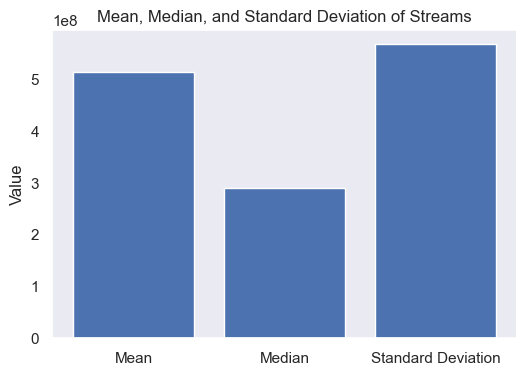

In [742]:
# Calculate the mean, median, and standard deviation for the 'streams' column
mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_streams = df['streams'].std()

# Create a list of the statistics and their corresponding labels
stats = [mean_streams, median_streams, std_streams]
labels = ['Mean', 'Median', 'Standard Deviation']

# Create a bar chart to display the statistics
plt.figure(figsize=(6, 4))
plt.bar(labels, stats)

# Add a title and labels
plt.title('Mean, Median, and Standard Deviation of Streams')
plt.ylabel('Value')

# Show the plot
plt.show()

#### Distribution of released_year and artist_count

In [725]:
# Use bar plot to show the distribution of released_year and artist_count
year_and_artist = df.groupby('released_year')['artist_count'].sum().reset_index()
distribution = px.bar(year_and_artist, x='released_year', y='artist_count', title='Distribution of released_year and artist_count')
distribution

#### Upon analyzing the data above, we have noticed a trend regarding the distribution of released_year and its artist_count. We noticed that there are more artist counts (637) during 2022 compared to other years.

####  Outliers:
* We identify data points that significantly differ from the rest of the data
* These outliers can be caused by errors in data collection
* We are going to handle these outliers in the next steps by removing them

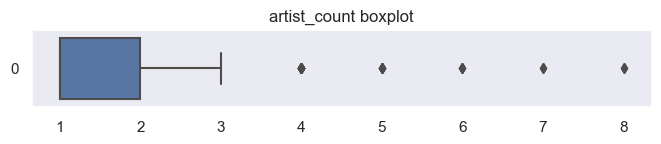

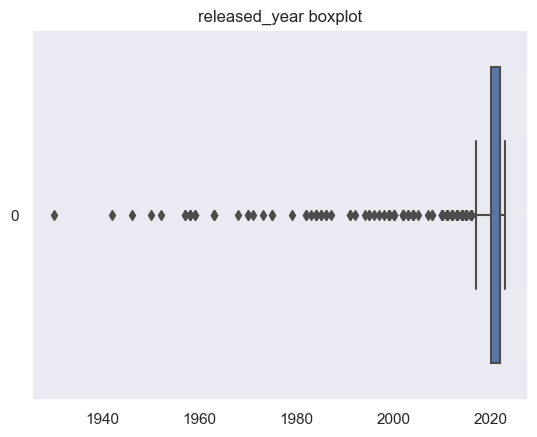

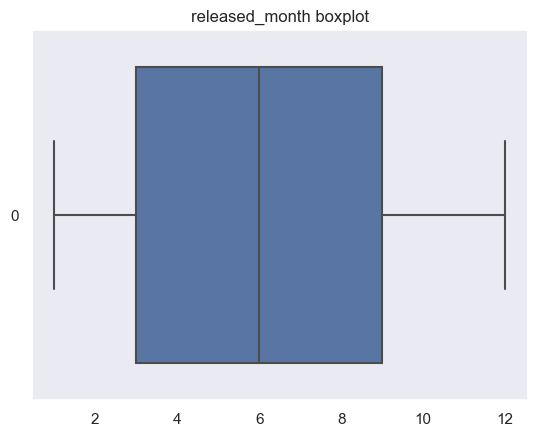

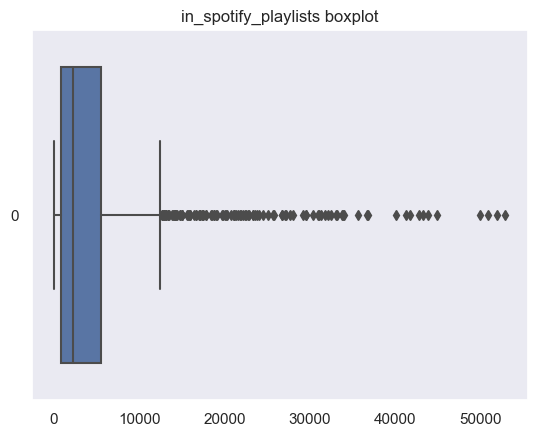

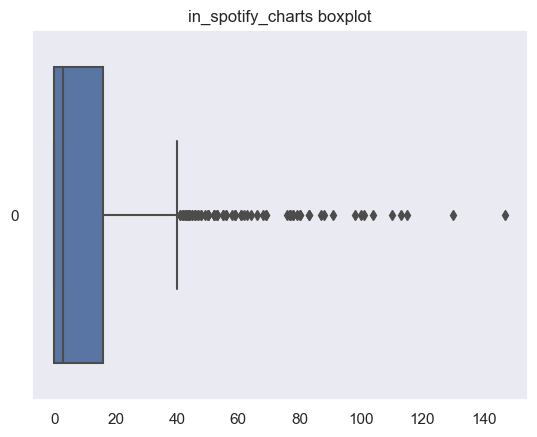

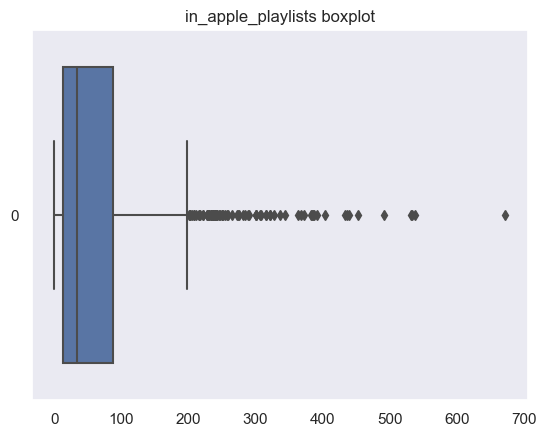

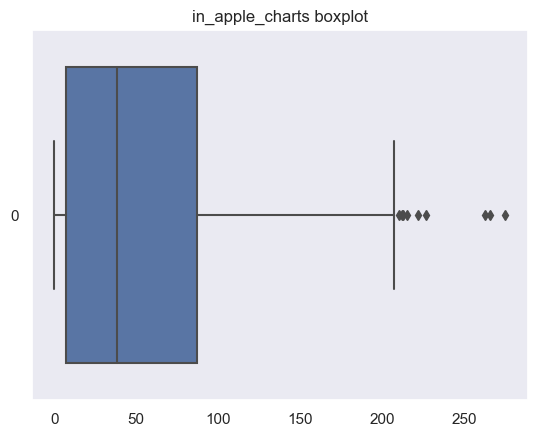

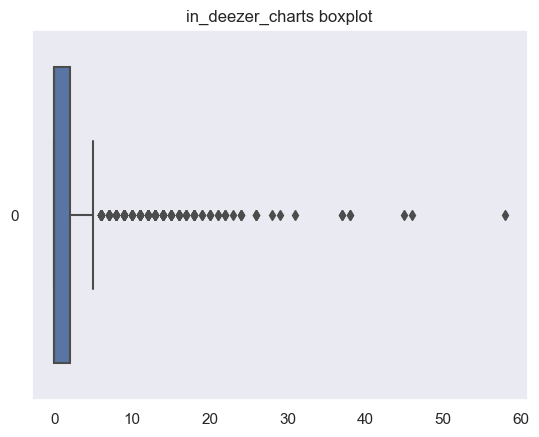

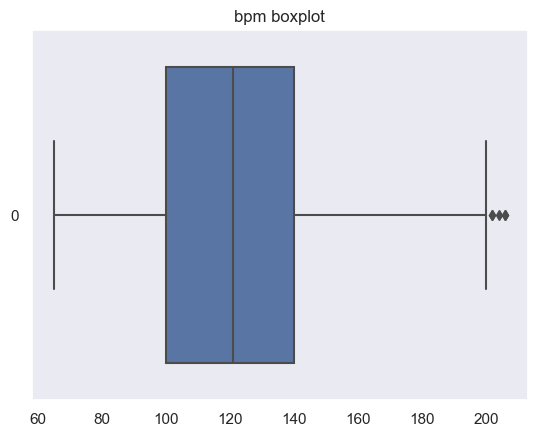

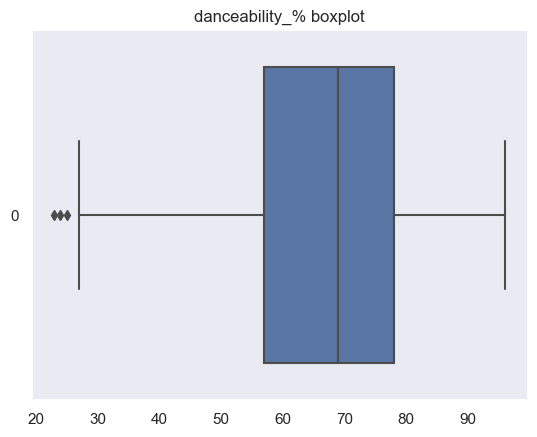

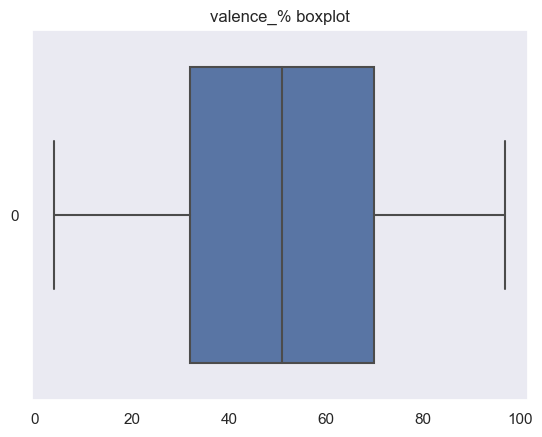

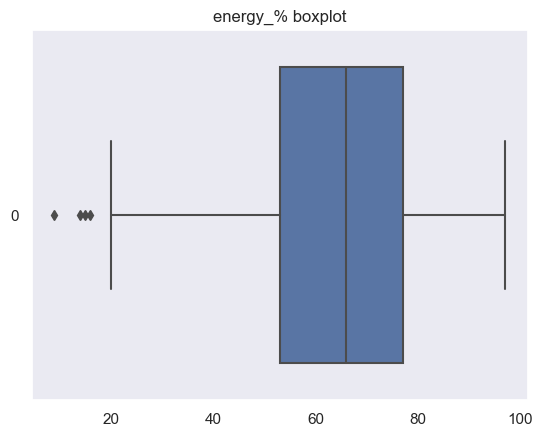

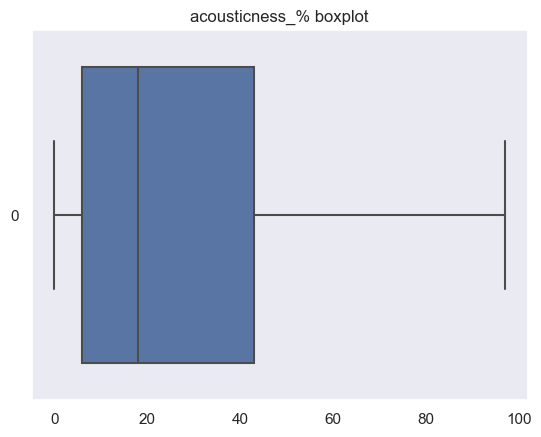

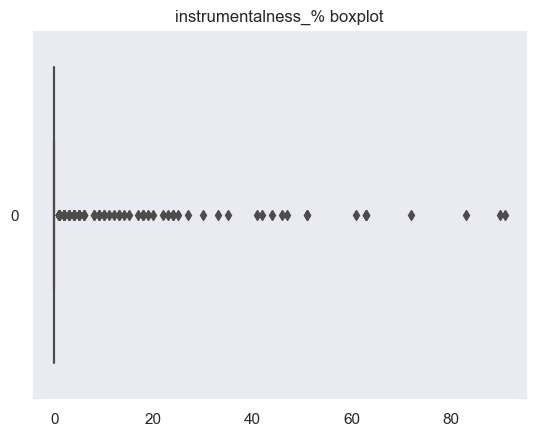

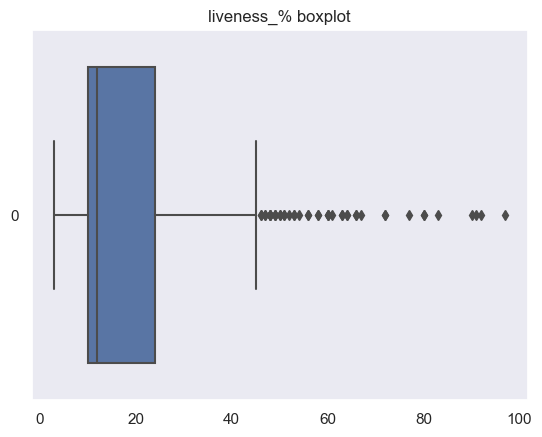

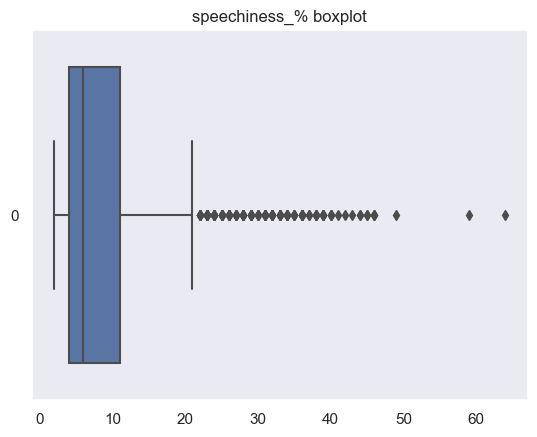

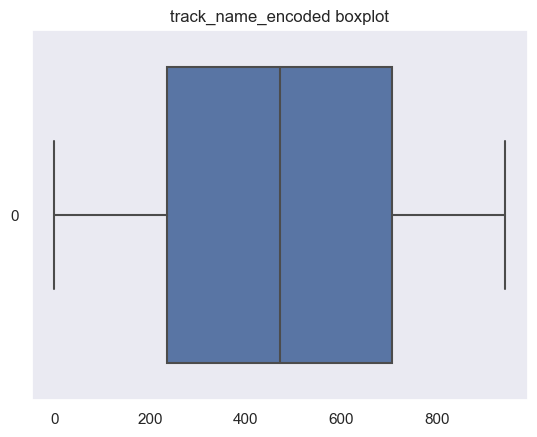

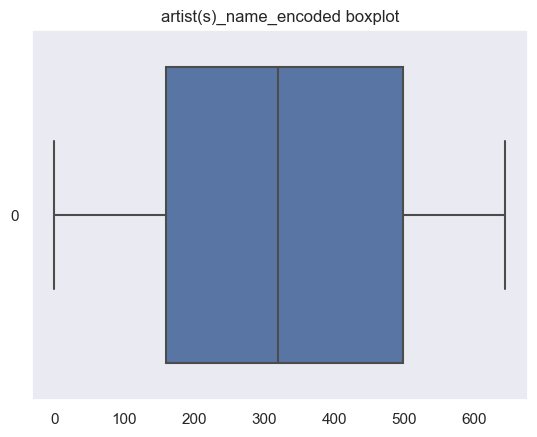

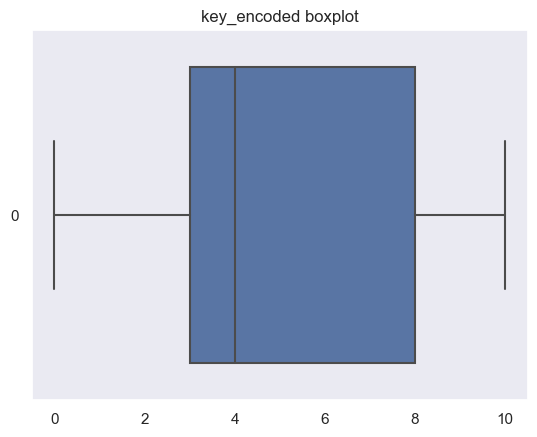

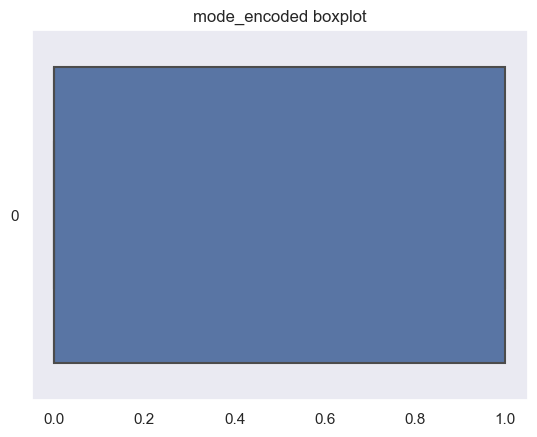

In [726]:
# Generate and display a horizontal boxplot for each numerical column in the dataframe for better visualization
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for col in num_cols:
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

* ##### Ensure that outliers has been removed

In [727]:
num_cols=['artist_count','released_year','in_spotify_playlists','in_spotify_charts','streams',
'in_apple_playlists','in_apple_charts','in_deezer_charts','instrumentalness_%',
'liveness_%','speechiness_%']
for col in num_cols:
    # Check to make sure the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.75)
        IQR = Q3 - Q1
        Lower_Fence = Q1 - 1.5 * IQR
        Upper_Fence = Q3 + 1.5 * IQR
        Lower_Outliers = df[df[col] < Lower_Fence][col].values
        Upper_Outliers = df[df[col] > Upper_Fence][col].values
        df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
        df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

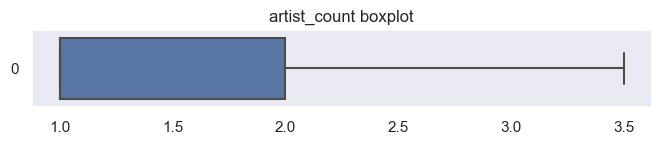

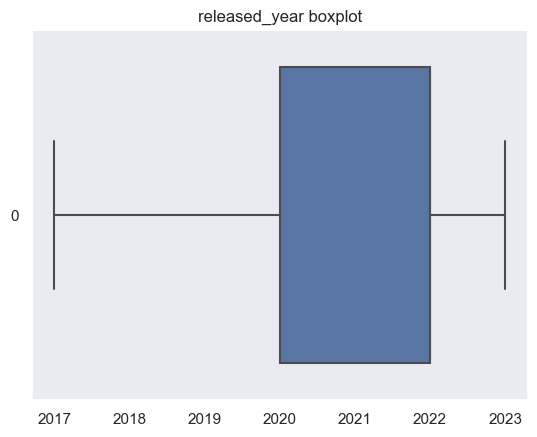

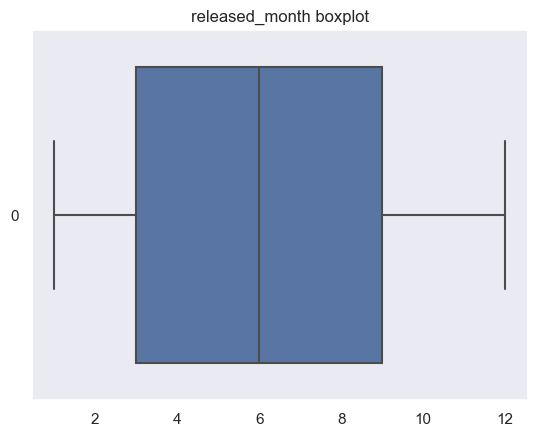

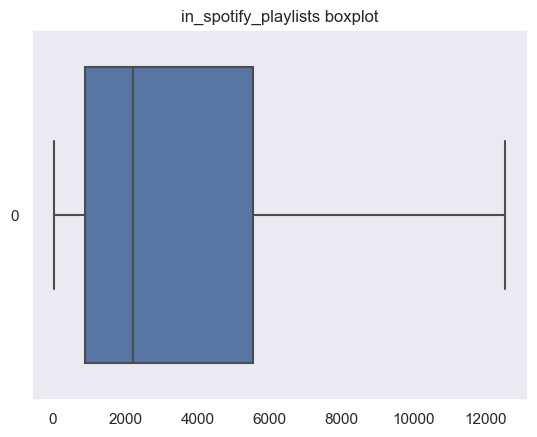

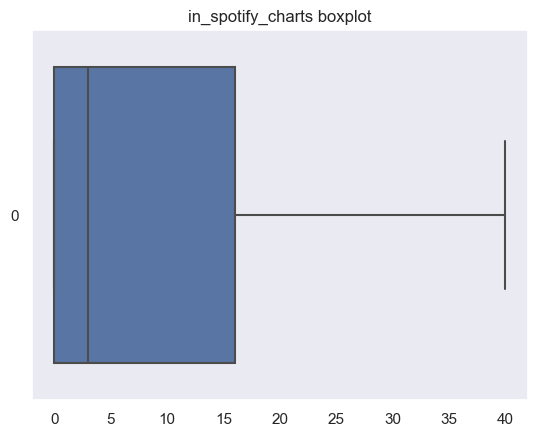

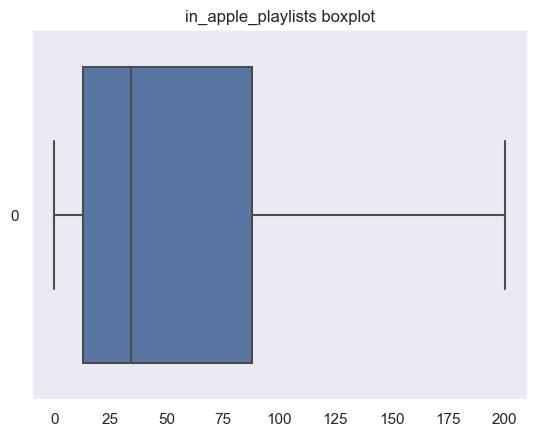

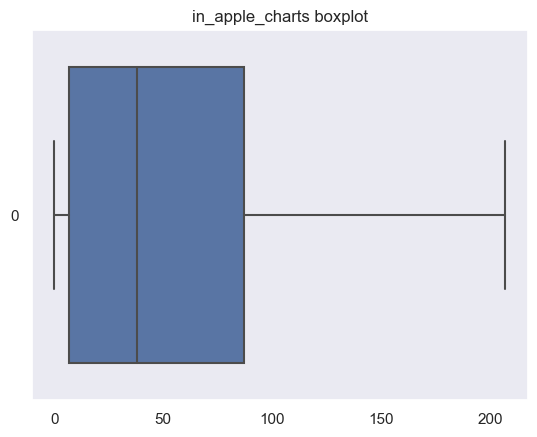

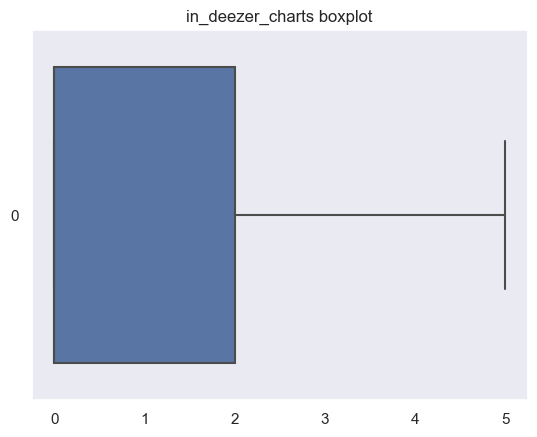

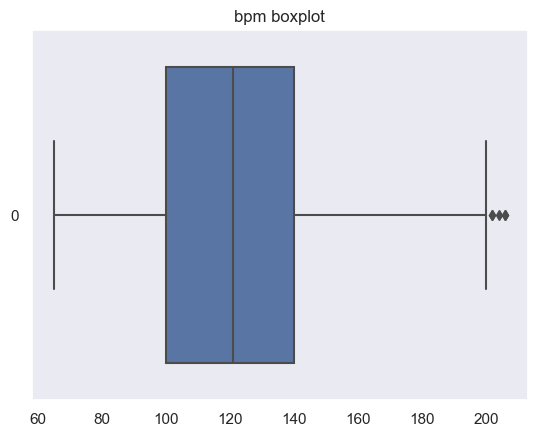

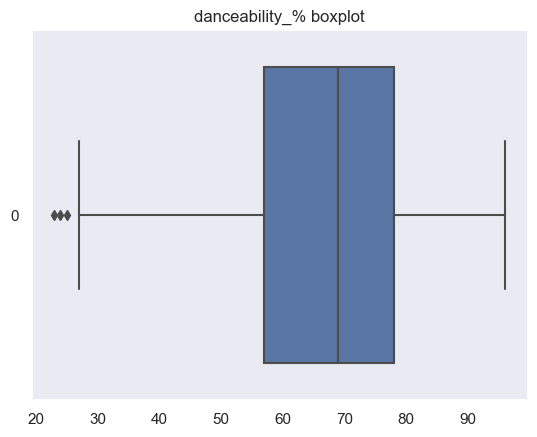

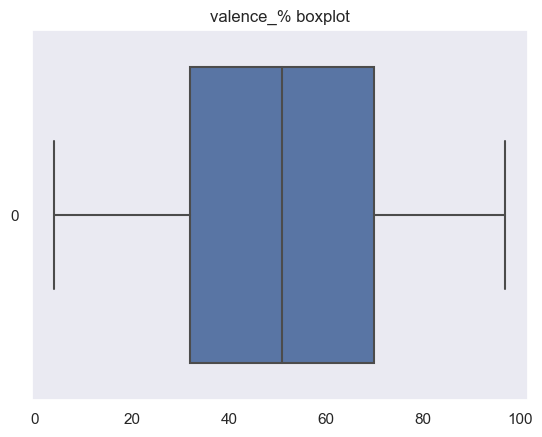

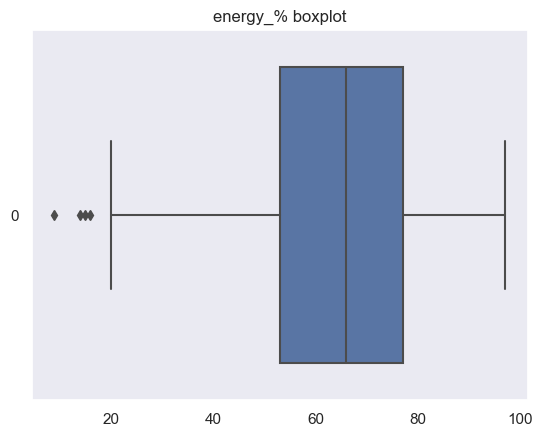

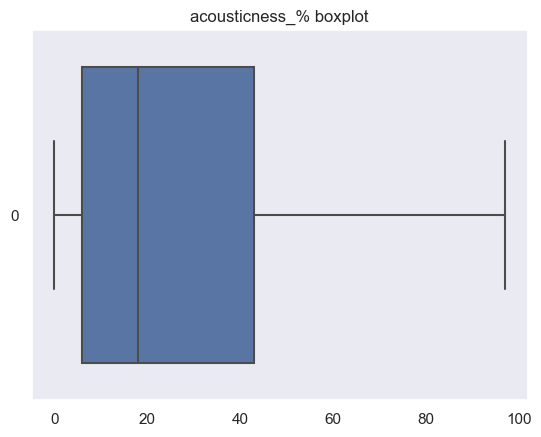

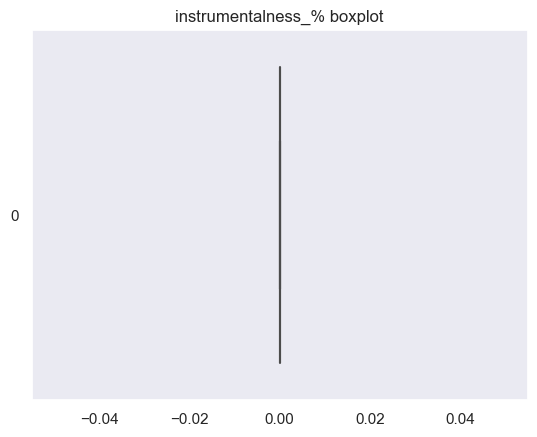

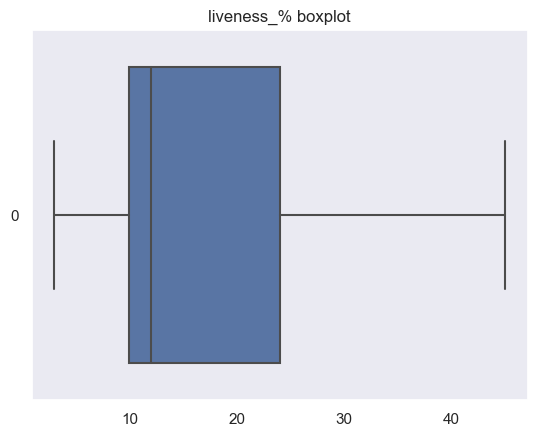

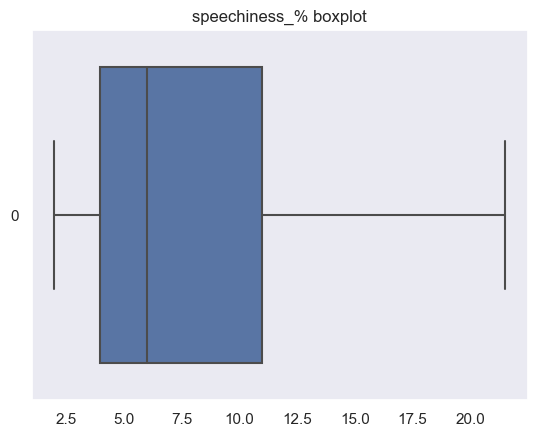

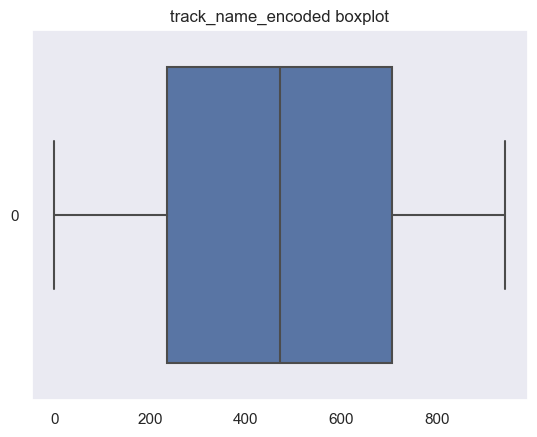

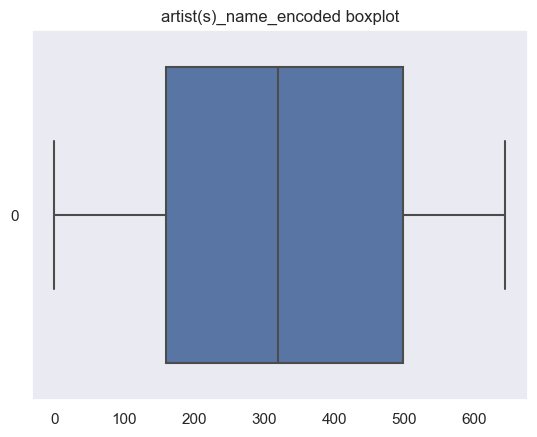

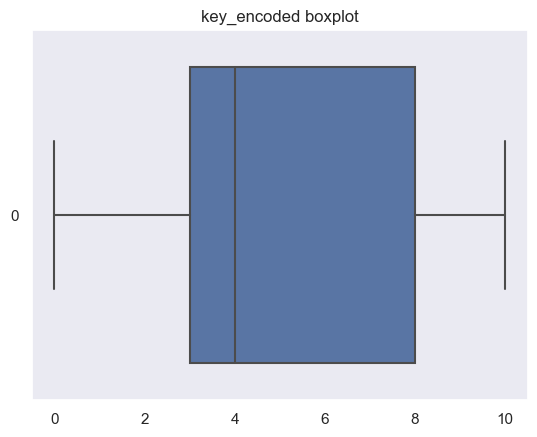

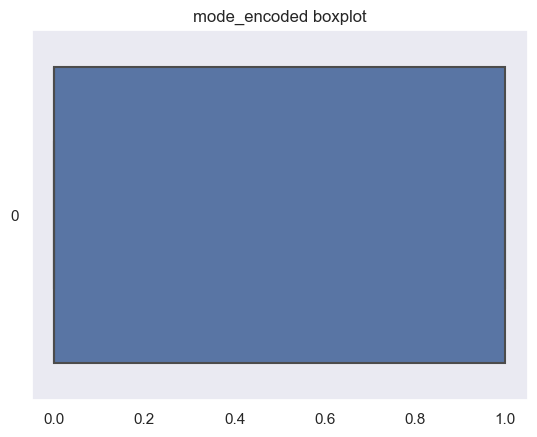

In [728]:
# Generate horizontal boxplots for all numerical columns in the dataframe
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for col in num_cols:
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

##  Visualization:
* In this seection, we are going to identify patterns and trends in the data by using appropriate visualization
* We are going to use bar plot, heat map, scatter plot, and box plot

### Top Performers
* This section highlights the top-performing tracks and artists in the dataset based on two key metrics: stream counts and the number of tracks.

#### Top 5 Most Streamed Songs

In [729]:
# Sorts the dataframe by the number of streams in descending order, and extracts the top 5 songs with the highest stream counts
top_songs = df.sort_values(by='streams', ascending=False).head()

top_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist(s)_name_encoded,key_encoded,mode_encoded
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1.0,2017,1,2877.0,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16.0,0,...,75,69,7,0,17,3.0,447,165,0,0
33,Anti-Hero,Taylor Swift,1.0,2022,10,9082.0,40,999748277,200.5,142,...,51,63,12,0,19,5.0,53,558,6,0
625,Arcade,Duncan Laurence,1.0,2019,3,6646.0,0,991336132,107.0,47,...,27,33,82,0,14,4.0,57,157,0,1
253,Glimpse of Us,Joji,1.0,2022,6,6330.0,6,988515741,109.0,42,...,27,32,89,0,14,5.0,300,261,10,0
455,Seek & Destroy,SZA,1.0,2022,12,1007.0,0,98709329,5.0,31,...,35,65,44,0,21,7.0,680,498,3,0


In [730]:
# Use bar plot to show the top 5 most streamed songs
streamed_songs = px.bar(top_songs, y = 'streams' , x ='track_name',title='Top 5 Most Streamed Songs')
streamed_songs

An unusual entry in row 574 of the streams prompted the decision to replace it with the mode value

In [731]:
# Convert the 'streams' column to numeric, forcing invalid entries to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Find the most frequent value in the 'streams' column
mode_of_stream = df['streams'].mode()[0]

# Specify the row index to be modified
index_to_change = 574 # number of row

# Replace the value in the 'streams' column at the specified row with the mode
df.loc[index_to_change, 'streams'] = mode_of_stream
print(df.iloc[index_to_change])

track_name                Love Grows (Where My Rosemary Goes)
artist(s)_name                              Edison Lighthouse
artist_count                                              1.0
released_year                                            2017
released_month                                              1
in_spotify_playlists                                   2877.0
in_spotify_charts                                           0
streams                                           156338624.0
in_apple_playlists                                       16.0
in_apple_charts                                             0
in_deezer_playlists                                        54
in_deezer_charts                                            0
in_shazam_charts                                            0
bpm                                                       110
key                                                         A
mode                                                    Major
danceabi

In [732]:
# Extracts the top 5 songs based on the highest number of streams
top_songs = df.sort_values(by='streams', ascending=False).head(5)

top_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist(s)_name_encoded,key_encoded,mode_encoded
55,Blinding Lights,The Weeknd,1.0,2019,11,12542.5,40,3.703895e+09,200.5,199,...,38,80,0,0,9,7.0,100,572,3,0
179,Shape of You,Ed Sheeran,1.0,2017,1,12542.5,10,3.562544e+09,33.0,0,...,93,65,58,0,9,8.0,693,159,3,1
86,Someone You Loved,Lewis Capaldi,1.0,2018,11,12542.5,40,2.887242e+09,200.5,125,...,45,41,75,0,11,3.0,723,331,3,0
620,Dance Monkey,Tones and I,1.0,2019,5,12542.5,0,2.864792e+09,200.5,167,...,54,59,69,0,18,10.0,184,593,8,1
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.0,2018,10,12542.5,40,2.808097e+09,200.5,117,...,91,50,54,0,7,5.0,753,465,4,0


In [734]:
# Use bar plot to show the top 5 most streamed songs
streamed_songs = px.bar(top_songs, y = 'streams' , x ='track_name',title='Top 5 Most Streamed Songs')
streamed_songs 

#### Based on the data above, we notice that the top 5 most streamed tracks are:
1. Blinding Lights - The Weeknd
2. Shape of You - Ed Sheeran
3. Someone you loved - Lewis Capaldi
4. Dance Monkey - Tones and I
5. Sunflower - Spider-Man: Into the Spider-Verse - Post Malone, Swae Lee

#### Top 5 Most Frequent Artists

In [735]:
# Group the dataset by artist name and count the number of tracks each artist has
artist_counts = df.groupby('artist(s)_name')['track_name'].count().reset_index()

# Arrange the artists in descending order based on the number of tracks
artist_counts = artist_counts.sort_values(by='track_name', ascending=False)

# Select the top 5 artists who have the most tracks
top_5_artists = artist_counts.head(5)

# Create a bar chart to visualize the top 5 artists and their track counts, and display the plot
fig = px.bar(top_5_artists, x='artist(s)_name', y='track_name', 
             title='Top 5 Most Frequent Artists Based on Number of Tracks', 
             labels={'track_name': 'Number of Tracks', 'artist(s)_name': 'Artist'})

fig.show()

#### Based on the data shown above, the top 5 most frequent artists based on the number of tracks in the dataset are:
1. Taylor Swift
2. The Weeknd
3. SZA
4. Bad Bunny
5. Harry Styles

### Temporal Trends:
* This section explores the release patterns of tracks over time, providing insights into how the music industry evolves year by year and month by month.

#### Total Streams per year

In [736]:
# Using bar plot to show total streams per year
streams_per_year = df.groupby('released_year')['streams'].sum().reset_index()
total_streams = px.bar(streams_per_year, x='released_year', y='streams', title='Total Streams per Year')
total_streams

#### As we can see, the year with the highest total streams (185.991B) is during 2017, followed by 2022  (116.402B) and 2021 (73.8081B)

#### Number of tracks released per year

In [737]:
# Group the data by the released_year and count the number of tracks for each year
tracks_per_year = df.groupby('released_year')['track_name'].count().reset_index()

# Rename the column to represent the track count
tracks_per_year.rename(columns={'track_name': 'track_count'}, inplace=True)

# Plot the number of tracks released per year
number_of_tracks = px.line(tracks_per_year, x='released_year', y='track_count', title='Number of Tracks Released per Year')
number_of_tracks

#### We were able to identify the trend in the number of tracks released per year using a line chart. We noticed that the highest number of tracks that were released is during 2022 with a count of 402 tracks.

#### Number of Tracks released per month

In [738]:
# Groups the data by released_month and count the number of tracks for each month
tracks_per_month = df.groupby('released_month')['track_name'].count().reset_index()

# Rename the column to improve clarity
tracks_per_month.rename(columns={'track_name': 'track_count'}, inplace=True)

# Sorts the data by month to ensure the months are in sequential order
tracks_per_month.sort_values(by='released_month', inplace=True)

# Visualize the number of tracks released each month
songs_per_month = px.bar(tracks_per_month, x='released_month', y='track_count', title='Number of Tracks Released per Month', labels={'released_month': 'Month', 'track_count': 'Track Count'})
songs_per_month


#### Based on the data above, we can see that the highest number of tracks released per month is on January (1) with a total count of 134 tracks, which is followed by the month of May (5) with a total count of 128 tracks, and both March (3) and June (6) with a total count of 86 tracks.

### Genre and Music Characteristics:
* In this section, we explore the relationships between various musical attributes and their impact on track popularity (streams), as well as correlations between different music characteristics.
* We will use a heatmap and scatterplot to visualize the relationships between numerical variables like bpm, energy percentage, danceability percentage, valence percentage, and streams.

#### Correlation Between Streams and Musical Attributes

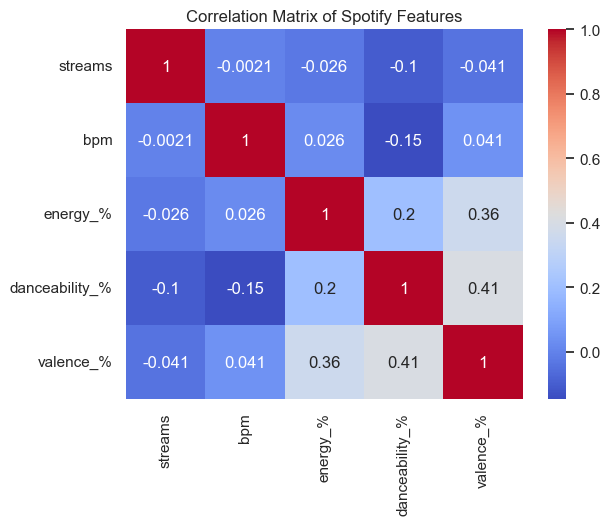

In [739]:
# Computes the correlation between streams, bpm, energy, danceability, and valence, and visualizes these relationships using a heatmap
corr_matrix = df[['streams', 'bpm', 'energy_%', 'danceability_%', 'valence_%']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Spotify Features')
plt.show()

#### Correlation Value Interpretation:
* Values range from -1 to 1. Positive values (shades of red) indicate a positive relationship, while negative values (shades of blue) indicate a negative one.
#### Key Correlations:
1. Danceability_% has a moderate positive correlation with valence_% (0.41), indicating that more danceable songs tend to have a higher "positivity" in mood.
2. Energy_% also has a moderate positive correlation with valence_% (0.36), suggesting that higher energy songs may have a happier tone.
3. There are weak correlations between streams and other features, indicating that these features may not strongly influence the popularity of a song (represented by streams).

#### Correlation Between Danceability_% and Energy_%

In [740]:
# Creates an interactive scatter plot that shows the relationship between danceability and energy by mode
danceability_energy = px.scatter(df, x='danceability_%', y='energy_%',color='mode',template='plotly_white', title='Danceability vs. Energy by Mode')
danceability_energy

#### Interpretation:
* There appears to be a positive trend, where songs with higher danceability also tend to have higher energy, but with significant scatter. This suggests a loose positive relationship between danceability and energy.

#### Correlation Between Valence_% and Acousticness_%

In [741]:
# Creates an interactive scatter plot that shows the relationship between acousticness and valence by mode
valence_acousticness = px.scatter(df, x='acousticness_%', y='valence_%',color='mode',template='plotly_white', title='Acousticness vs. Valence by mode')
valence_acousticness

#### Interpretation:
* There is no strong linear trend between acousticness and valence, implying that a song’s acoustic nature doesn't strongly predict its mood or positivity.

### Platform Popularity:
* This section analyzes the distribution of tracks across different platforms, including in_spotify_playlists, in_spotify_charts, and in_apple_playlists, to understand platform preferences and identify which one favors the most popular tracks.

#### Track Comparison in Spotify and Apple Playlists/Charts

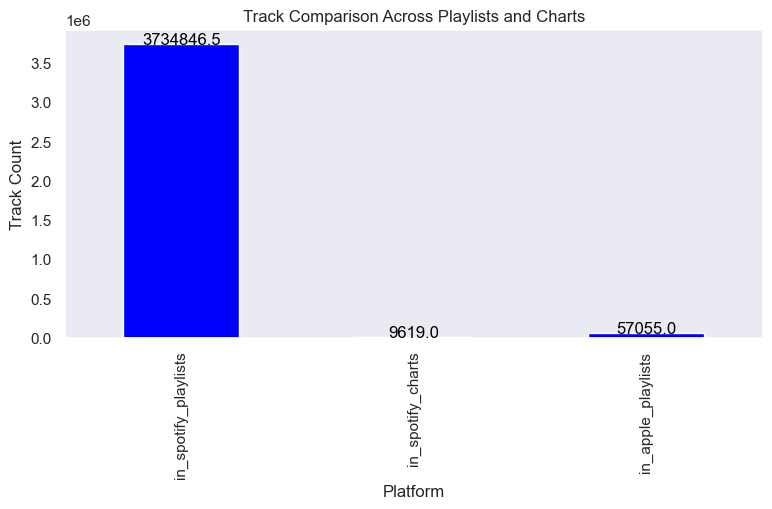

In [699]:
# Define the columns representing each platform
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']

# Sum the track counts for each platform (across all rows)
platform_totals = df[platform_columns].sum()

# Generate a bar chart to compare the platforms
plt.figure(figsize=(9, 4))
platform_totals.plot(kind='bar', color='blue')

# Add title and labels to the plot
plt.title('Track Comparison Across Playlists and Charts')
plt.xlabel('Platform')
plt.ylabel('Track Count')

# Annotate each bar with the corresponding track count
for i, total in enumerate(platform_totals):
    plt.text(i, total + 10, str(total), color='black', ha='center', fontsize=12)

# Display the plot
plt.show()

#### Based on the data shown above, it can be seen that the platform which seems to favor the most popular tracks is in_spotify_playlists with a total number of 3.734847M tracks played.

### Advanced Analysis
* This section delves deeper into more complex relationships within the data, exploring patterns based on musical features and track performance across different platforms.

#### Distribution of Songs by Mode

In [700]:
# Uses pie chart to show the distrbution of the stream based on mode
mode_df = df['mode'].value_counts().reset_index()
mode_df.columns = ['mode', 'count']
px.pie(mode_df, values='count', names='mode', title='Distribution of Songs by Mode (Major/Minor)')

#### If we are going to compare the distribution of songs by mode (major/minor), we can notice that 57.7% of the songs have major as its mode, while the remaining 42.3% have minor as its mode. 
* In terms of interpretation, more songs are in the Major mode than in the Minor mode, suggesting that Major mode songs are slightly more prevalent in this collection or stream of songs.

#### Most Frequently Appearing Artists in Playlists or Charts.

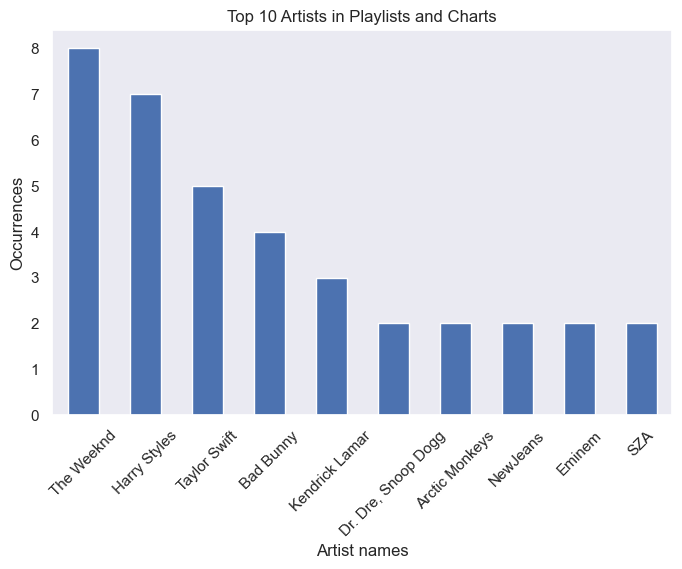

In [701]:
# Select artists that have tracks present in any playlists or charts
artists_in_playlists_or_charts = df[
    (df['in_spotify_playlists'] == 1) | (df['in_deezer_playlists'] == 1) | (df['in_apple_playlists'] == 1) |
    (df['in_spotify_charts'] == 1) | (df['in_deezer_charts'] == 1) | (df['in_apple_charts'] == 1) |
    (df['in_shazam_charts'] == 1)
]['artist(s)_name']

# Determine how often each artist appears
artist_count_in_playlists = artists_in_playlists_or_charts.value_counts()

# Create a bar graph showing the top 10 artists who frequently appear in playlists and charts
artist_count_in_playlists.head(10).plot(kind='bar', figsize=(8, 5))  # Default color
plt.title('Top 10 Artists in Playlists and Charts')
plt.xlabel('Artist names')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

#### Based on the data above, we have identified that the top 10 artists appearing most frequently in playlists or charts are:
1. The Weeknd
2. Harry Styles
3. Taylor Swift
4. Bad Bunny 
5. Kendrick Lamar
6. Dr. Dre, Snoop Dogg
7. Arctic Monkeys
8. NewJeans
9. Eminem
10. SZA

## Summary

1. Data Overview
* Data Set: The dataset includes columns such as track_name, artist(s)_name, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apply_charts, and various musical attributes (danceability_%, energy_%, bpm, etc.)
* Data Structure: The dataset contains a total number of 953 rows and 24 columns, with data types such as int64 (17) and object (7). 
* Dropping Columns: To tidy up the columns, we have removed columns that are not necessary for our data and kept the necessary columns. 
* Missing values: We have identified that there are missing values in the columns 'in_shazam_charts' (50) and 'key' (95), which were filled with the mode of their respective columns. We have also double checked if there are still any missing values left.
* Unique Numbers: We have also identified unique numbers of each category
* Correlation Analysis: We have evaluated the relationship between features and the target label by using corr() to calculate the correlation matrix.
2. Basic Descriptive Statistics
* 'Streams': We have identified the descriptive statistics of the 'streams' column, particulary its mean, median, and standard deviation and representing it with a pie chart.
* Distribution of Released_year and Artist_count: We were able to identify a trend regarding the distribution of released_year and its artist_count. We noticed that there are more artist counts (637) during 2022 compared to other years.
* Dealing with Outliers: Boxplots were used to identify and address outliers in numerical columns, helping to create a more refined dataset for analysis.
3. Bar Plots:
* Top 5 Most Streamed Tracks: We used bar plots to visualize the top 5 most streamed songs. 
* Top 5 Most Frequent Artists by Track Count: We also used bar plots to identify the top 5 most frequent artists based on its track count.
* Total Streams per Year: Using bar plots, we have also compared which particalur year has the highest number of streams.
* Number of Tracks Released per Month: We identified a trend regarding the number of tracks released per month using bar plot. We noticed that January has the highest number of released songs.
* Top 10 Artists in Playlists and Charts: We were able to analyze that The Weeknd is the most popular artist frequently appearing in playlists/charts by using bar plot.
* Track Comparison in Spotify and Apple Playlists/Charts: We were able to identify which platform seems to  favor the most popular tracks, which is spotify, using a bar plot.
4. Line Chart:
* Number of Tracks Released per Year: We used a line chart to identify a trend regarding the number of tracks released per year. It seems like the year 2022 has the highest number of tracks released in a single year.
5. Heat map:
* Correlation Between Streams and Musical Attributes: We were able to correlate streams and musical attributes using a heat map. We have identified that danceability has a moderate positive correlation with valence, indicating that more danceable songs tend to have a higher "positivity" in mood while energy also has a moderate positive correlation with valence, suggesting that higher energy songs may have a happier tone.
6. Scatter plot:
* Correlation Between Danceability and Energy: We used scatter plot to correlate danceability and energy. We found out that there is a weak positive correlation between danceability and energy, with higher danceability often linked to higher energy, though there's considerable variation.
* Correlation Between Valence and Acousticness: We also used scatter plot to correlate these two musical attributes. We found out that there is no clear linear relationship between acousticness and valence, suggesting that a song's acoustic features don't strongly indicate its mood or positivity.
7. Pie Chart: 
* Mean, Median, and Standard Deviation of 'Streams': We have identified the descriptive statistics of the 'streams' column using a pie chart.
* Distribution of Songs by Mode: We were able to distribute the tracks by mode using a pie chart. We have identified that there are more songs in the Major mode than the Minor mode, indicating a slight prevalence of Major mode songs.